In [1]:
using NBInclude
@nbinclude("reheat.ipynb");

In [2]:
if @isdefined(WEAVE_ARGS) && haskey(WEAVE_ARGS,"parset")
    parset=WEAVE_ARGS["parset"]
else
    parset = 6
end

6

In [3]:
if parset==1
    p0 = genpars(0.01, 3.0479591836734693e6);
    tspectrum1=0.965e6
    tspectrum2=0.98e6
    tspectrum3=tspectrum2
    trajtmax=9.7e5
    qmax=0.01
elseif parset==6
    p0 = genpars(0.01, 1.869e6);
    tspectrum1=0.965e6
    tspectrum2=0.98e6
    tspectrum3=0.9631e6
    trajtmax=9.7e5
    qmax=0.01
elseif parset==2
    p0 = genpars(0.01, 2.9e6);
    tspectrum1=0.964e6
    tspectrum2=0.9702e6
    tspectrum3=tspectrum2
    trajtmax=10e5
    qmax=0.01
elseif parset==3
    p0 = genpars(0.01, 2.77e6);
    tspectrum1=0.964e6
    tspectrum2=0.9751e6
    tspectrum3=tspectrum2
    trajtmax=9.7e5
    qmax=0.01
elseif parset==4
    p0 = genpars(0.01, 4e6);
    tspectrum1=0.965e6
    tspectrum2=1.0e6
    tspectrum3=tspectrum2
    trajtmax=9.7e5
    qmax=0.01
elseif parset==5
    p0 = genpars(0.01, 18e6);
    tspectrum1=0.979e6
    tspectrum2=1.08e6
    tspectrum3=tspectrum2
    trajtmax=10e5
    qmax=0.01
end
                    
vmax=1e-11
                    
tmax=2e6 # Background time integration end

recalc=true;

In [4]:
println("β=$(p0.β)")
println("λ=$(p0.λ)")
println("ξ=$(p0.ξ)")

β=1.869e6
λ=0.01
ξ=4470.045861062278


Range of momenta at the end of the Starobinsky peak in units of $M_P$

In [5]:
qlist=range(0.0001,qmax,length=100)

0.0001:0.0001:0.01

Spectrum plotted at (t=0 corresponds to $X=\sqrt{6}M_P$):

In [6]:
(tspectrum1,tspectrum2)

(965000.0, 980000.0)

# Reheating in $R^2$ Higgs inflation.

## System setup

In [7]:
using Plots
using PyPlot: @L_str
#pyplot();
pyplot(fmt=:svg);

Minimum and maximum $\beta$

In [8]:
(βmin(0.01), βmax(0.01))

(1.590283923182483e6, 1.0e9)

## Background plots

In [9]:
#p0 = genpars(0.01, 1.7e7);
#tmax=2e6
if recalc || ! @isdefined(bgsol)
    @time bgsol=solve_background(p0, (0.0, tmax));
end;
#plot(bgsol,
#    xlim=(8.5e5,tmax),
#    vars=[4 3],lw=1,layout=(2,1),ylabel=[L"\Phi" L"H"],xlabel=["" "t"],label="")

  6.579577 seconds (67.05 M allocations: 2.200 GiB, 11.82% gc time)


In [10]:
bgsol(0)*1024

5-element Array{Float64,1}:
    0.0
    0.0
   14.235128472815067
 2508.277496609974
    0.0

In [11]:
let MPl=10-24, Mplsq=MPl*MPl, beta=p0.β, xi=p0.ξ,  lambda=p0.λ, PHI=2508.277496609974, CHI=14.206311331075307, v1, v2
  v1 = Mplsq/3/beta*PHI  -xi*MPl/sqrt(6.)/beta*CHI^2     +7/beta/108*PHI^3*4+xi/3/beta*PHI*CHI^2    -MPl/sqrt(6.)/beta*PHI^2
  v2 = (lambda+xi^2/beta)*CHI^3 -xi*MPl/sqrt(6.)/beta*PHI*CHI*2  +xi/6/beta*PHI^2*CHI*2 
  (v1,v2)
end

(2614.6867490532345, 102909.61023994884)

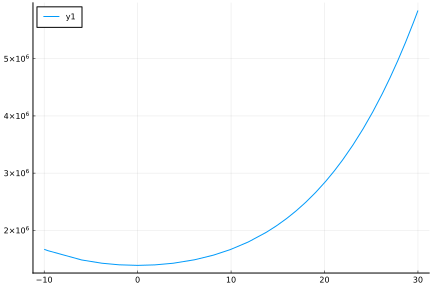

In [12]:
let MPl=10-24, Mplsq=MPl*MPl, beta=p0.β, xi=p0.ξ,  lambda=p0.λ, PHI=2508.277496609974, CHI=14.206311331075307, v1, v2
  v1 = Mplsq/3/beta*PHI  -xi*MPl/sqrt(6.)/beta*CHI^2     +7/beta/108*PHI^3*4+xi/3/beta*PHI*CHI^2    -MPl/sqrt(6.)/beta*PHI^2
    vv(PHI,CHI) = (lambda+xi^2/beta)*CHI^4/4+Mplsq/6/beta*PHI^2    -xi*MPl/sqrt(6.)/beta*PHI*CHI^2   +7/beta/108*PHI^4+xi/6/beta*PHI^2*CHI^2  -MPl/3/sqrt(6.)/beta*PHI^3
  v2(CHI) = (lambda+xi^2/beta)*CHI^3 -xi*MPl/sqrt(6.)/beta*PHI*CHI*2  +xi/6/beta*PHI^2*CHI*2 
  #plot(v2,-10,30)
    plot(x->vv(2508,x),-10,30)
end

Initial and final times for the Starobinsky peak, start of second peak

In [13]:
tt0, tt1, tt2 = (t0(bgsol),t1(bgsol),t2(bgsol))

(952631.0, 959918.0, 1.109267e6)

In [14]:
# Select start before 1st peak., and end after the second peak for future integration over the modes
tkmin=tt0-(tt1-tt0)*4;
tkmax=tt2+(tt1-tt0)*5;

In [15]:
#checkBgsolQuality(bgsol,dt=1.0)

Generic background evolution:

In [16]:
bgsol(0.85e6)

5-element Array{Float64,1}:
 -3.377082992377843e-8
 -4.619314747199065e-6
  0.008472233073840834
  0.47443589710043804
  4.097693408747983

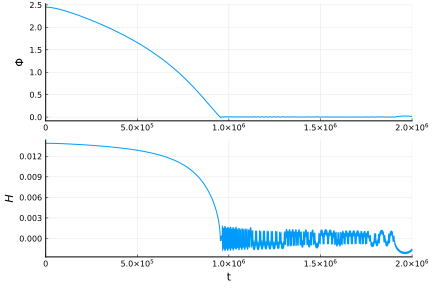

In [17]:
plot(bgsol,vars=[4 3],lw=1,layout=(2,1),ylabel=[L"\Phi" L"H"],xlabel=["" "t"],label="")

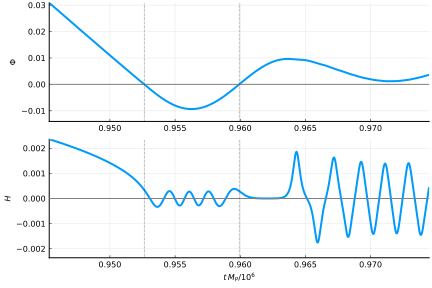

In [18]:
let a=tt0-(tt1-tt0),b=tt1+2*(tt1-tt0),
    ii=findfirst(t->t>=a, bgsol.t):10:findfirst(t->t>b,bgsol.t)
    plot(bgsol.t[ii]/1e6,bgsol[4,ii],lw=2,layout=(2,1),ylabel=L"\Phi",
        xlabel="", guidefontsize=8,
        label="", subplot=1,
    xlim=(a,b)./1e6, 
    ylim=(1.5*bgsol((tt0+tt1)/2)[4],max(bgsol(a)[4],bgsol(b)[4])))
    hline!([0],lw=1,c=:grey,label="")
    plot!(bgsol.t[ii]/1e6,bgsol[3,ii],lw=2,ylabel=L"H",ylim=(-bgsol(a)[3],bgsol(a)[3]),
        xlim=(a,b)./1e6,
        xguide="\$t\\,M_P/10^6\$", guidefontsize=8,
        subplot=2,label="")
hline!([0],lw=1,c=:grey, subplot=2,label="")
    vline!([t0(bgsol),t1(bgsol)]./1e6, label="", c=:black, ls=:dot,lw=0.5,subplot=1)
    vline!([t0(bgsol),t1(bgsol)]./1e6, label="", c=:black, ls=:dot,lw=0.5,subplot=2)
end

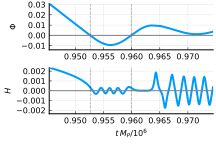

In [19]:
plot!(size=(300,200))

In [20]:
savefig("figspaper/fieldzoom_$parset.pdf")

In [21]:
if false
let ii=findfirst(x->x[4]<1,bgsol.u):10:length(bgsol.t)
    potplot(bgsol.prob.p,camera=(60,81))
    plot!(bgsol[3,ii],bgsol[4,ii],[fV(bgsol[i],bgsol.prob.p) for i in ii],
        label="", ylim=(-0.5,1), c=:red, lw=1)
end
end

"Nice" background evolution zoomed into the first oscillation only

In [22]:
let p=p0, xlim=LinRange(-0.1,0.5,101),
    hmax = hminAlt(abs(xlim[1]),p)*2,
    hlim = LinRange(-hmax,hmax,101),
    vmax = sqrt(fV(0.0,xlim[end],p)*fV(hlim[1],xlim[end],p)),
    ii=findfirst(x->x[4]<0.5,bgsol.u):10:findfirst(t->(t>tt1&&bgsol(t,idxs=2)<0),bgsol.t),
    ii2=ii[end]:10:findfirst(t->t>tt2+(tt1-tt0),bgsol.t),
    ll= @layout [ dp f
                  h  _ ]

    plot(hlim, xlim, (x,y)->(fV(x,y,p)),
        st=[:contourf], clim=(0,0.2*vmax), xlim=(hlim[1],hlim[end]),
        seriescolor=cgrad(:blues, rev=true), cflip=true, colorbar=:none, levels=256,
        subplot=1, link=:both, layout=ll, grid=:none
#        ,size=(1500,1000)
    )
    plot!(bgsol[3,ii],bgsol[4,ii],
        label="", ylim=(xlim[1],xlim[end]), c=:red, lw=0.5)
    plot!(bgsol[3,ii2],bgsol[4,ii2],
        label="", ylim=(xlim[1],xlim[end]), c=:green, lw=0.5)
#    plot!((x->hminAlt(x,p0)).(LinRange(0,0.5,101)),LinRange(0,0.5,101),c=:yellow)
    plot!(bgsol.t[ii]/1e6,bgsol[4,ii],ylim=(xlim[1],xlim[end]),subplot=2,
        ylabel=L"\Phi_0/M_P", xlabel=L"t\,M_P/10^6", c=:red,legend=:none,lw=0.5)
    plot!(bgsol.t[ii2]/1e6,bgsol[4,ii2],ylim=(xlim[1],xlim[end]), subplot=2,
        c=:green,lw=0.5)
    hline!([0], subplot=2, c=:black, lw=0.5)
    plot!(bgsol[3,ii],bgsol.t[ii]/1e6,xlim=(hlim[1],hlim[end]),subplot=3,
        yaxis=:flip, xlabel=L"H_0/M_P",c=:red,legend=:none,lw=0.5,
    ylabel=L"t\,M_P/10^6")
    plot!(bgsol[3,ii2],bgsol.t[ii2]/1e6,xlim=(hlim[1],hlim[end]),subplot=3,
        yaxis=:flip,c=:green,lw=0.5)
    vline!([0], subplot=3, c=:black, lw=0.5)
end

In [23]:
savefig("figspaper/fieldevol_$parset.pdf")

In [24]:
let p=p0, xlim=LinRange(1.1*bgsol[4,findfirst(x->x[2]>0,bgsol.u)],0.05,101),
    hmax = hminAlt(abs(xlim[1]),p)*2,
    hlim = LinRange(-hmax,hmax,101),
    vmax = vmax,
    ii0=findfirst(x->x[4]<0.05,bgsol.u):10:findfirst(x->x[3]<0.002,bgsol.u),
    ii=findfirst(x->x[4]<0.05,bgsol.u):10:findfirst(v->v[2]>0,bgsol.u),
    ii2=ii[end]:10:findfirst(t->t>trajtmax,bgsol.t),
    ii3=ii[end]:10:findfirst(x->(x[4]>0.005&&x[2]>0),bgsol.u),
    ll= @layout [ dp f
                  h  _ ]

    plot(hlim, xlim, (x,y)->(fV(x,y,p)),
        st=[:contourf], clim=(0,vmax),
        xlim=(hlim[1],hlim[end]),
        ylim=(xlim[1],0.05),
        color=cgrad(:blues, rev=true), colorbar=:none, levels=256,
        grid=:none,
        xlabel="\$H/M_P\$", ylabel="\$\\Phi/M_P\$",guidefontsize=8,
#        ,size=(1500,1000)
    )
    plot!(bgsol[3,ii],bgsol[4,ii],
        label="", c=:red, lw=1)
    plot!(bgsol[3,ii0],bgsol[4,ii0],
        label="", c=:red, lw=1, arrow=1)
    plot!(bgsol[3,ii2],bgsol[4,ii2],
        label="", c=:green, lw=1,
            xlim=(hlim[1],hlim[end]),
        ylim=(xlim[1],0.05))
    plot!(bgsol[3,ii3],bgsol[4,ii3],
        label="", c=:green, lw=1, arrow=1)
#    plot!((x->hminAlt(x,p0)).(LinRange(0,0.5,101)),LinRange(0,0.5,101),c=:yellow)
end

In [25]:
savefig(plot!(size=(300,200)),"figspaper/trajectory_$parset.pdf");

Energy balance.  For "proper" reheating we should check that there are significant energy in H

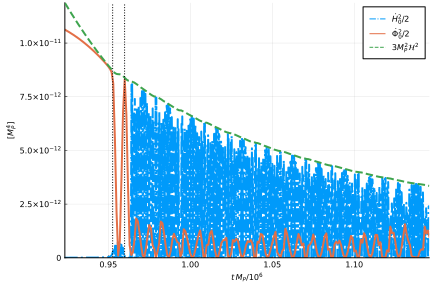

In [26]:
plot(xlim=(tkmin,tkmax)./1e6,ylim=(0,3*fH(bgsol,tkmin)^2))
let lab="", step=10, plotv=false,
    p0 = bgsol.prob.p,
    i=1:step:length(bgsol.t),
    ir=1:100*step:length(bgsol.t),
    scale = 1 # 3*fH(sol.u[1],p0)^2

    plot!(bgsol.t[i]/1e6,[fKh(u,p0)/scale for u in bgsol.u[i]], ls=:dashdot, label="\$\\dot{H}_0^2/2\$"*lab, lw=2)
    plot!(bgsol.t[ir]/1e6,[fKx(u,p0)/scale for u in bgsol.u[ir]], label="\$\\dot{\\Phi}_0^2/2\$"*lab, lw=2)
    if plotv
        Plots.plot!(sol.t[i]/1e6,[fV(u,p0)/scale for u in bgsol.u[i]], ls=:dash, label="\$V\$"*lab, lw=1)
    end
    plot!(bgsol.t[i]/1e6,[3*fH(u,p0)^2/scale for u in bgsol.u[i]],
                    label="\$3M_P^2{\\cal H}^2\$"*lab, lw=2, ls=:dash)
    vline!([t0(bgsol),t1(bgsol)]/1e6, label="", c=:black, ls=:dot,lw=1)
end
plot!(xlabel=L"t\,M_P/10^6", ylabel=L"[M_P^4]", guidefontsize=8)

In [27]:
savefig(plot!(size=(300,200)),"figspaper/bgenergy_$parset.pdf");

## Masses for the background evolution

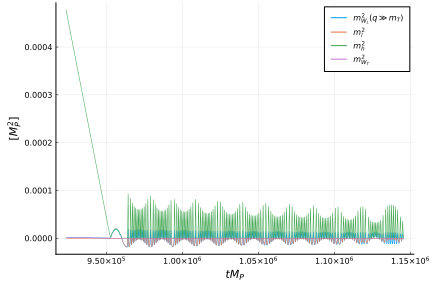

In [28]:
let inds = findall(t->t>=tkmin && t<tkmax, bgsol.t)[1:10:end]
    plot(bgsol.t[inds],[mw2(u,p0) for u in bgsol.u[inds]],lw=0.5, label=L"m_{W_L}^2 (q\gg m_T)") #(0.9e6,1e6)
    plot!(bgsol.t[inds],[ml2(u,p0) for u in bgsol.u[inds]],lw=0.5, label=L"m_l^2") #(0.9e6,1e6)
    plot!(bgsol.t[inds],[mh2(u,p0) for u in bgsol.u[inds]],lw=0.5, label=L"m_h^2") #(0.9e6,1e6)
    plot!(bgsol.t[inds],[mwt2(u,p0) for u in bgsol.u[inds]],lw=0.5, label=L"m_{W_T}^2") #(0.9e6,1e6)
    plot!(xlabel=L"t M_P", ylabel=L"[M_P^2]")
end

In [29]:
if false
let tt0=t0(bgsol), tt1=tmax,
        inds = findall(t->t>=tt0 && t<tt1, bgsol.t)[1:10:end]
    plot(bgsol.t[inds],[mw2(u,p0) for u in bgsol.u[inds]],lw=0.5, label=L"m_{W_L}^2") #(0.9e6,1e6)
    plot!(bgsol.t[inds],[ml2(u,p0) for u in bgsol.u[inds]],lw=0.5, label=L"m_l^2") #(0.9e6,1e6)
    plot!(bgsol.t[inds],[-sqrt(3)*p0.ξ/sqrt(p0.β)*fH(u,p0) for u in bgsol.u[inds]],lw=0.5, label="Hubble")
    plot!(xlabel=L"t", ylim=(-5e-6,5e-6))
end
end

The same, but zoomed to the interesting region

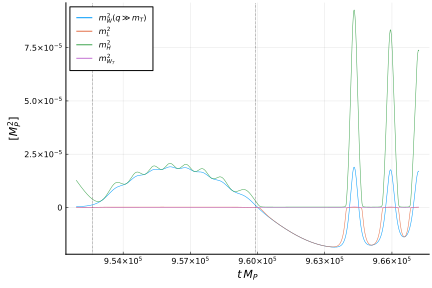

In [30]:
let inds = findall(t->t>=tt0-0.1*(tt1-tt0) && t<tt1+(tt1-tt0), bgsol.t)[1:10:end]
    plot(bgsol.t[inds],[mw2(u,p0) for u in bgsol.u[inds]],lw=0.5, label=L"m_{W}^2 (q\gg m_T)") #(0.9e6,1e6)
    plot!(bgsol.t[inds],[ml2(u,p0) for u in bgsol.u[inds]],lw=0.5, label=L"m_L^2") #(0.9e6,1e6)
    plot!(bgsol.t[inds],[mh2(u,p0) for u in bgsol.u[inds]],lw=0.5, label=L"m_H^2") #(0.9e6,1e6)
    plot!(xlabel=L"t\,M_P", ylabel=L"[M_P^2]")
    plot!(bgsol.t[inds],[mwt2(u,p0) for u in bgsol.u[inds]],lw=0.5, label=L"m_{W_T}^2") #(0.9e6,1e6)
    vline!([t0(bgsol),t1(bgsol)], label="", c=:black, ls=:dot,lw=0.5)
end

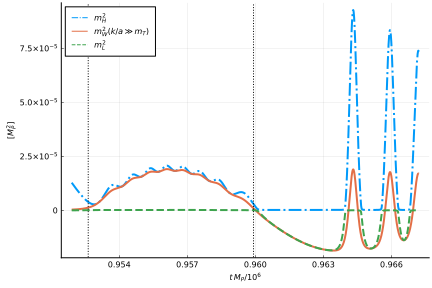

In [31]:
let inds = findall(t->t>=tt0-0.1*(tt1-tt0) && t<tt1+(tt1-tt0), bgsol.t)[1:10:end]
    plot(bgsol.t[inds]/1e6,[mh2(u,p0) for u in bgsol.u[inds]],lw=2,ls=:dashdot, label=L"m_H^2",
        legend=:topleft) #(0.9e6,1e6)
    plot!(bgsol.t[inds]/1e6,[mw2(u,p0) for u in bgsol.u[inds]],lw=2, label=L"m_{W}^2 (k/a\gg m_T)") #(0.9e6,1e6)
    plot!(bgsol.t[inds]/1e6,[ml2(u,p0) for u in bgsol.u[inds]],lw=2,ls=:dash, label=L"m_L^2") #(0.9e6,1e6)
    plot!(xlabel=L"t\,M_P/10^6", ylabel=L"[M_P^2]", guidefontsize=8)
    vline!([t0(bgsol),t1(bgsol)]/1e6, label="", c=:black, ls=:dot,lw=1)
end

In [32]:
savefig(plot!(size=(300,200)),"figspaper/masszoom_$parset.pdf");

In [33]:
## Mode evolution
#For reference: $a(0)=1$, and at the start of integration for modes we have
#print("a($(tkmin))=$(abg(bgsol,tkmin))");

In [34]:
#At the start of the Starobinsky peak:
#print("a($(t0(bgsol)))=$(abg(bgsol,t0(bgsol)))");

In [35]:
#At the end of Starobinsky peak:
#print("a($(t1(bgsol)))=$(abg(bgsol,t1(bgsol)))")

In [36]:
tspan = (tkmin,tkmax)
klist=qlist*abg(bgsol,tt1)
pertp0 = [klist, bgsol]
pertu0 = pertu_in(pertp0,tspan[1])
pertprob = ODEProblem(perteqns,pertu0,tspan,pertp0)
pertprob_exact = ODEProblem(perteqns_exact,pertu0,tspan,pertp0);

In [37]:
#alg=ABM54()
#alg=AB5()
#@timiiie sol_approx = solve(pertprob,alg,dt=1,saveat=50);

In [38]:
if recalc || ! @isdefined(sol)
    #alg=ABM54()
    alg=AB5()
    @time sol = solve(pertprob_exact,alg,dt=1,saveat=50);
end;

 55.321010 seconds (1.43 G allocations: 33.213 GiB, 7.27% gc time)


## Energy Density evolution in the modes

Let us first see when the energy in the modes overtakes total background energy. Magent lines markes the moments when the spectra are plotted

Zoomed into the "tachionic" region

In [39]:
rhomax=max(50*fH(sol.prob.p[2],t0(bgsol))^2,50*rhow(sol,tspectrum1));

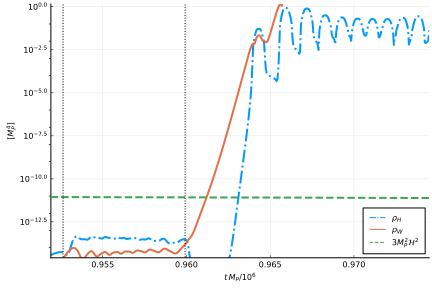

In [40]:
plot(yscale=:log10, ylim=(0.5*rhoh(sol,tt0),rhomax),
    xlabel=L"t\,M_P/10^6", ylabel=L"[M_P^4]",lw=2);
plot!(sol.t/1e6,[rhoh(sol,t) for t in sol.t], ls=:dashdot, lw=2,label=L"\rho_H");
plot!(sol.t/1e6,[rhow(sol,t,exact=true) for t in sol.t], lw=2, label=L"\rho_W");
plot!(sol.t/1e6,[3*fH(sol.prob.p[2],t)^2 for t in sol.t], lw=2, label=L"3M_P^2{\cal H}^2", ls=:dash);
vline!([t0(bgsol),t1(bgsol)]/1e6, label="", c=:black, ls=:dot, lw=1);
plot!(xlim=(tt0-0.1*(tt1-tt0),tt1+(tt1-tt0)*2)./1e6,
    guidefontsize=8)

In [41]:
savefig(plot!(size=(300,200)),"figspaper/rhozoom_$parset.pdf");

In [42]:
tspectrum3=0.9612e6
tspectrum3=0.9631e6

963100.0

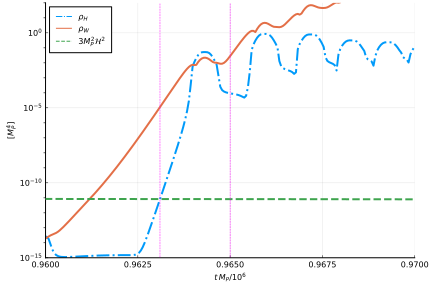

In [43]:
plot!(size=(600,400),ylim=(1e-15,100),xlim=(tt0,1e6)./1e6)
vline!([t0(bgsol),t1(bgsol),tt2]/1e6, label="", c=:black, ls=:dot, lw=0.5)
vline!([tspectrum1, tspectrum2,tspectrum3]/1e6, c=:magenta, ls=:dash, label="",lw=0.5)
plot!(xlim=(0.96,0.97))

Overall

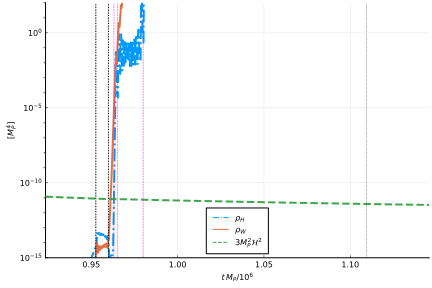

In [44]:
plot!(xlim=(tkmin,tkmax)./1e6)

## Spectra

### Spectrum just after the tachyonic moment

In [45]:
ti=findfirst(t->(t>=tspectrum1),sol.t)
wmax1,nmax1=findmax([abs2(nwlexact(sol,sol.t[ti],i)*2*π.*kk(sol,i)^2/abg(bgsol,sol.t[ti])^3) for i in 1:length(kk(sol))])

(2.4502243058256787e8, 14)

In [46]:
abg(bgsol,sol.t[ti])

77.34471529062773

In [47]:
abg(bgsol,tt1)

76.6909330840218

In [48]:
abg(bgsol,ti)

1.0046544889905926

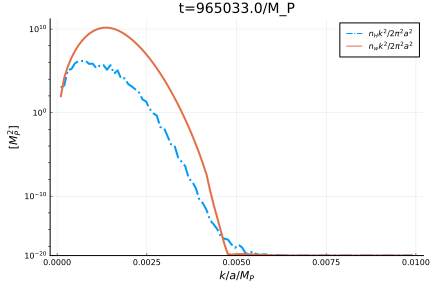

In [49]:
#@gif for i=1:100:length(pertsol.t)
#i=length(pertsol.t)
plot(title="t=$(sol.t[ti])/M_P")
#plot!(pertsol.prob.p[1]/abg(bgsol,pertsol.t[i]),abs2.(pertmodes[1:8:end,i]), label=L"n_h")
ki=1:length(kk(sol))
a0=abg(bgsol,tt1)
a0=abg(bgsol,sol.t[ti])
plot!(kk(sol)/a0,
      [ abs2(nH(sol,sol.t[ti],i)*4*π.*kk(sol,i)^2/(2*pi^2*abg(bgsol,sol.t[ti])^2)) for i in ki],
      label=L"n_H k^2/2\pi^2a^2", ls=:dashdot, lw=2)
plot!(kk(sol)/a0,
      [ abs2(nwlexact(sol,sol.t[ti],i)*4*pi.*kk(sol,i)^2/(2*pi^2*abg(bgsol,sol.t[ti])^2)) for i in ki],
      label=L"n_w k^2/2\pi^2a^2", lw=2)
#plot!(kk(sol),#/abg(bgsol,sol.t[ti]),
#      [ abs2(nwl(sol,sol.t[ti],i)) for i in ki], label=L"n_w", yscale=:log10, xlim=(0,0.15), ylim=(1e-12,1e20))
plot!(yscale=:log10, xlabel=L"k/a/M_P", ylabel=L"[M_P^2]")
#vline!([kk(sol,nmax1)/a0],label="")

In [50]:
savefig(plot!(size=(300,200)),"/home/fedor/spec2.pdf");

In [51]:
savefig(plot!(size=(300,200)),"figspaper/specearly_$parset.pdf");

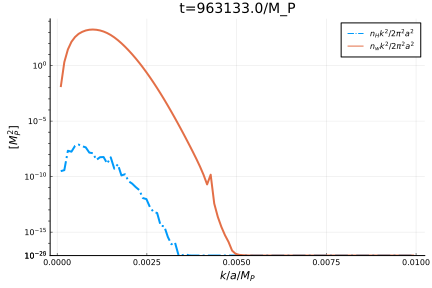

In [52]:
ti=findfirst(t->(t>=tspectrum3),sol.t)
wmax1,nmax1=findmax([abs2(nwlexact(sol,sol.t[ti],i)*2*π.*kk(sol,i)^2/abg(bgsol,sol.t[ti])^3) for i in 1:length(kk(sol))])
#@gif for i=1:100:length(pertsol.t)
#i=length(pertsol.t)
plot(title="t=$(sol.t[ti])/M_P")
#plot!(pertsol.prob.p[1]/abg(bgsol,pertsol.t[i]),abs2.(pertmodes[1:8:end,i]), label=L"n_h")
ki=1:length(kk(sol))
a0=abg(bgsol,tt1)
a0=abg(bgsol,sol.t[ti])
plot!(kk(sol)/a0,
      [ abs2(nH(sol,sol.t[ti],i)*4*π.*kk(sol,i)^2/(2*pi^2*abg(bgsol,sol.t[ti])^2)) for i in ki],
      label=L"n_H k^2/2\pi^2a^2", ls=:dashdot, lw=2)
plot!(kk(sol)/a0,
      [ abs2(nwlexact(sol,sol.t[ti],i)*4*pi.*kk(sol,i)^2/(2*pi^2*abg(bgsol,sol.t[ti])^2)) for i in ki],
      label=L"n_w k^2/2\pi^2a^2", lw=2)
#plot!(kk(sol),#/abg(bgsol,sol.t[ti]),
#      [ abs2(nwl(sol,sol.t[ti],i)) for i in ki], label=L"n_w", yscale=:log10, xlim=(0,0.15), ylim=(1e-12,1e20))
plot!(yscale=:log10, xlabel=L"k/a/M_P", ylabel=L"[M_P^2]")
#vline!([kk(sol,nmax1)/a0],label="")

Frequencies at this moment

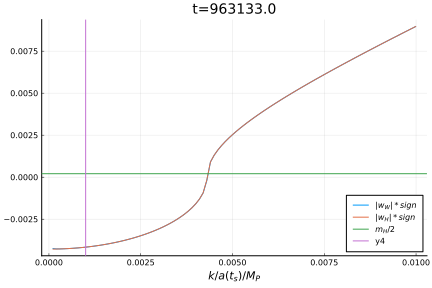

In [53]:
a0=abg(bgsol,tt1)
ww2e=ww2exact(bgsol,sol.t[ti],sol.prob.p[1])
wh2e=wh2swapped(bgsol,sol.t[ti],sol.prob.p[1])
plot(kk(sol)/a0,
    sqrt.(abs.(ww2e)).*sign.(ww2e),
    label=L"|w_W|*sign", title="\$t=$(sol.t[ti])/M_P\$"
)
plot!(kk(sol)/a0,
    sqrt.(abs.(wh2e)).*sign.(wh2e),
    xlabel=L"k/a(t_s)/M_P", label=L"|w_H|*sign", title="t=$(sol.t[ti])"
)
hline!([sqrt(abs(mh2(bgsol,sol.t[ti])))/2], label=L"m_H/2")
vline!([kk(sol,nmax1)/a0])

### Spectrum at later time

In [54]:
ti=findfirst(t->(t>=tspectrum2),sol.t)
wmax2,nmax2=findmax([abs2(nwlexact(sol,sol.t[ti],i)*2*π.*kk(sol,i)^2/abg(bgsol,sol.t[ti])^3) for i in 1:length(kk(sol))])

(2.3085833072042486e40, 20)

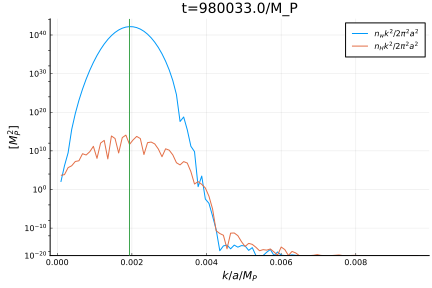

In [55]:
#@gif for i=1:100:length(pertsol.t)
#i=length(pertsol.t)
plot(title="t=$(sol.t[ti])/M_P")
#plot!(pertsol.prob.p[1]/abg(bgsol,pertsol.t[i]),abs2.(pertmodes[1:8:end,i]), label=L"n_h")
ki=1:length(kk(sol))
a0=abg(bgsol,tt1)
a0=abg(bgsol,sol.t[ti])
plot!(kk(sol)/a0,
      [ abs2(nwlexact(sol,sol.t[ti],i)*4*pi.*kk(sol,i)^2/(2*pi^2*abg(bgsol,sol.t[ti])^2)) for i in ki],
      label=L"n_w k^2/2\pi^2a^2")
plot!(kk(sol)/a0,
      [ abs2(nH(sol,sol.t[ti],i)*4*π.*kk(sol,i)^2/(2*pi^2*abg(bgsol,sol.t[ti])^2)) for i in ki],
      label=L"n_H k^2/2\pi^2a^2")
#      [ abs2(nwl(sol,sol.t[ti],i)) for i in ki], label=L"n_w", yscale=:log10, xlim=(0,0.15), ylim=(1e-12,1e20))
plot!(yscale=:log10, xlabel=L"k/a/M_P", ylabel=L"[M_P^2]")
vline!([kk(sol,nmax2)/a0],label="")

Let us plot the frequency of the modes.

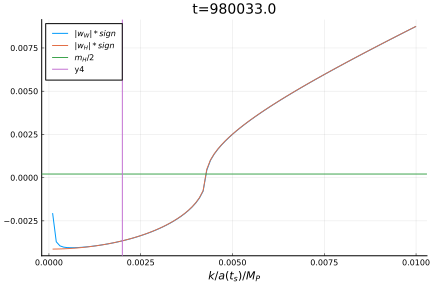

In [56]:
a0=abg(bgsol,tt1)
ww2e=ww2exact(bgsol,sol.t[ti],sol.prob.p[1])
wh2e=wh2swapped(bgsol,sol.t[ti],sol.prob.p[1])
plot(kk(sol)/a0,
    sqrt.(abs.(ww2e)).*sign.(ww2e),
    label=L"|w_W|*sign", title="t=$(sol.t[ti])"
)
plot!(kk(sol)/a0,
    sqrt.(abs.(wh2e)).*sign.(wh2e),
    xlabel=L"k/a(t_s)/M_P", label=L"|w_H|*sign", title="t=$(sol.t[ti])"
)
hline!([sqrt(abs(mh2(bgsol,sol.t[ti])))/2], label=L"m_H/2")
vline!([kk(sol,nmax2)/a0])

## Individual mode analysis

### Mode maximally produced in tachyonic region

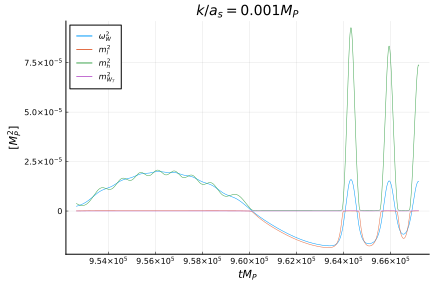

In [57]:
let inds = findall(t->t>=tt0 && t<tt1+(tt1-tt0), bgsol.t)[1:10:end]
    plot(bgsol.t[inds],[ww2exact(bgsol,t,kk(sol)[nmax1]) for t in bgsol.t[inds]],lw=0.5, label=L"\omega_{W}^2") #(0.9e6,1e6)
    plot!(bgsol.t[inds],[ml2(u,p0) for u in bgsol.u[inds]],lw=0.5, label=L"m_l^2") #(0.9e6,1e6)
    plot!(bgsol.t[inds],[mh2(u,p0) for u in bgsol.u[inds]],lw=0.5, label=L"m_h^2") #(0.9e6,1e6)
    plot!(bgsol.t[inds],[mwt2(u,p0) for u in bgsol.u[inds]],lw=0.5, label=L"m_{W_T}^2") #(0.9e6,1e6)
    plot!(xlabel=L"t M_P", ylabel=L"[M_P^2]", title="\$k/a_s=$(kk(sol)[nmax1]/a0)M_P\$")
end

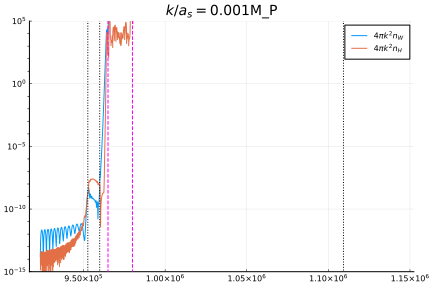

In [58]:
p1=plot(sol.t[2:end], [nwlexact(sol,t,nmax1)*4*π*kk(sol,nmax1)^2/abg(bgsol,t)^3 for t in sol.t[2:end]], label=L"4\pi k^2n_W",yscale=:log10,ylim=(1e-15,1e5))
plot!(sol.t[2:end], [nH(sol,t,nmax1)*4*π*kk(sol,nmax1)^2/abg(bgsol,t)^3 for t in sol.t[2:end]], label=L"4\pi k^2n_H",yscale=:log10,ylim=(1e-15,1e5))
plot!(title="\$k/a_s=$(kk(sol,nmax1)/abg(bgsol,tt1))\$M_P")
vline!([t0(bgsol),t1(bgsol),tt2], label="", c=:black, ls=:dot)
vline!([tspectrum1, tspectrum2], c=:magenta, ls=:dash, label="")

### Mode maximally produced at later time

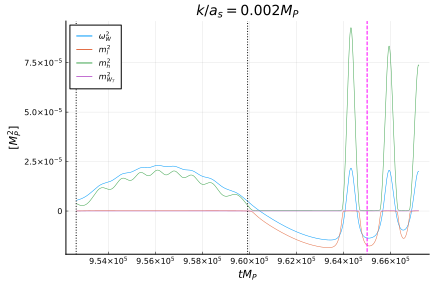

In [59]:
let inds = findall(t->t>=tt0 && t<tt1+(tt1-tt0), bgsol.t)[1:10:end]
    plot(bgsol.t[inds],[ww2exact(bgsol,t,kk(sol)[nmax2]) for t in bgsol.t[inds]],lw=0.5, label=L"\omega_{W}^2") #(0.9e6,1e6)
    plot!(bgsol.t[inds],[ml2(u,p0) for u in bgsol.u[inds]],lw=0.5, label=L"m_l^2") #(0.9e6,1e6)
    plot!(bgsol.t[inds],[mh2(u,p0) for u in bgsol.u[inds]],lw=0.5, label=L"m_h^2") #(0.9e6,1e6)
    plot!(bgsol.t[inds],[mwt2(u,p0) for u in bgsol.u[inds]],lw=0.5, label=L"m_{W_T}^2") #(0.9e6,1e6)
    plot!(xlabel=L"t M_P", ylabel=L"[M_P^2]", title="\$k/a_s=$(kk(sol)[nmax2]/a0)M_P\$")
    vline!([t0(bgsol),t1(bgsol)], label="", c=:black, ls=:dot)
    vline!([tspectrum1], c=:magenta, ls=:dash, label="")
end

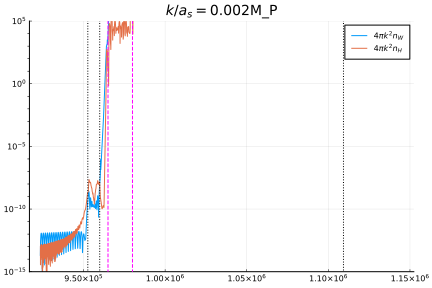

In [60]:
p1=plot(sol.t[2:end], [nwlexact(sol,t,nmax2)*4*π*kk(sol,nmax2)^2/abg(bgsol,t)^3 for t in sol.t[2:end]], label=L"4\pi k^2n_W",yscale=:log10,ylim=(1e-15,1e5))
plot!(title="\$k/a_s=$(kk(sol,nmax2)/abg(bgsol,tt1))\$M_P")
plot!(sol.t[2:end], [nH(sol,t,nmax2)*4*π*kk(sol,nmax2)^2/abg(bgsol,t)^3 for t in sol.t[2:end]], label=L"4\pi k^2n_H",yscale=:log10,ylim=(1e-15,1e5))
vline!([t0(bgsol),t1(bgsol),tt2], label="", c=:black, ls=:dot)
vline!([tspectrum1, tspectrum2], c=:magenta, ls=:dash, label="")

In [61]:
#Test of the conservation of "probabilities" — $|\alpha|^2-|\beta|^2=1$.  It is interesting to note, that for the higgs modes this is true only for the sum of the modes!

#There are strange features in the W modes, and the problem is not observed in the Higgs modes.  Seems there are minor problems with mass expressions for W, which is not there in the higgses (for large $k$, for small $k$ the features at zero crossing are everywhere).
if false
    plot(sol.t, [nwl(sol,t,ni) for t in sol.t], ylim=(-0.1,2))
plot!(sol.t, [nwlbar(sol,t,ni) for t in sol.t])
plot!(sol.t, [nwlbar(sol,t,ni)-nwl(sol,t,ni) for t in sol.t])
end

In [62]:
if false
    plot(sol.t, [nwlexact(sol_exact,t,ni) for t in sol.t], ylim=(-0.1,2))
plot!(sol.t, [nwlbarexact(sol_exact,t,ni) for t in sol.t])
plot!(sol.t, [nwlbarexact(sol_exact,t,ni)-nwlexact(sol_exact,t,ni) for t in sol.t])
end